# **Simulation of Mouse Brain Network**

In [ ]:
%reload_ext autoreload
%autoreload 2

from MBN_Res_Constrn import MBN_RC
import matplotlib.pyplot as plt
import numpy as np

# **Simulation**

In [ ]:
mbn = MBN_RC(nepochs=40000,
             dt=0.05,
             lambda_o=2.82,
             alpha=0.01,
             beta=0.002,
             plot_bifurcation=False)
mbn.run_model()

/content/mb_communities.npz already exists
DataUtils initialized
Average shortest path length:  2.1057608395470866
Avg clustering coefficient:  0.37852781810835767
LAMBDA_O=2.82, Global Order(R)=0.03891809443798492
LAMBDA_O=2.82, Global Order(R)=0.14940256684956346
LAMBDA_O=2.82, Global Order(R)=0.1117978992137523
LAMBDA_O=2.82, Global Order(R)=0.028144242344223164
LAMBDA_O=2.82, Global Order(R)=0.08837131577204024
LAMBDA_O=2.82, Global Order(R)=0.060515693243948544
LAMBDA_O=2.82, Global Order(R)=0.5313253074339733
LAMBDA_O=2.82, Global Order(R)=0.07418552342522285
LAMBDA_O=2.82, Global Order(R)=0.006042355118257774
LAMBDA_O=2.82, Global Order(R)=0.054519947859525186
LAMBDA_O=2.82, Global Order(R)=0.03139298033338854
LAMBDA_O=2.82, Global Order(R)=0.06845865087417016
LAMBDA_O=2.82, Global Order(R)=0.10736476499209675
LAMBDA_O=2.82, Global Order(R)=0.0647145396318413
LAMBDA_O=2.82, Global Order(R)=0.09393933162962878
LAMBDA_O=2.82, Global Order(R)=0.04169592357338507
LAMBDA_O=2.82, Glob

# **Plot: Time vs Global Order**


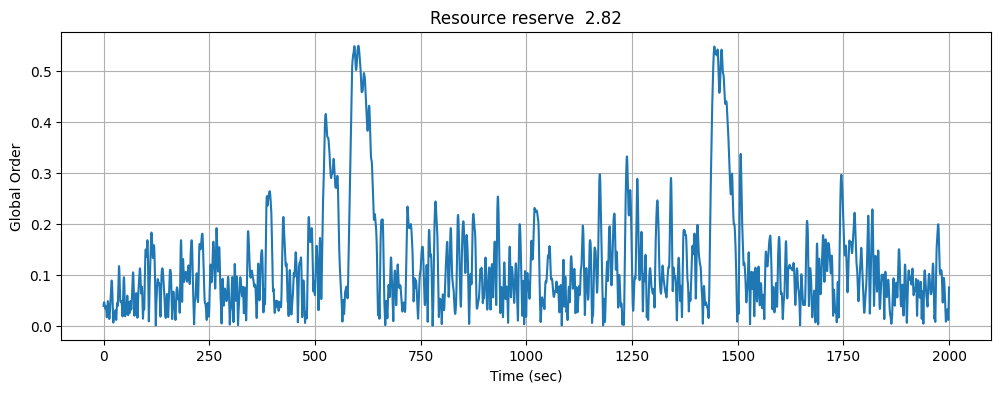

In [ ]:
f = plt.figure(figsize=(12, 4))
plt.title("Resource reserve  " + str(mbn.LAMBDA_O))
plt.plot(np.linspace(0, mbn.NEPOCHS-1, mbn.NEPOCHS)*mbn.DT, mbn.GLOBAL_ORDER_VERBOSE)
plt.ylabel("Global Order")
plt.xlabel("Time (sec)")
plt.grid()
plt.show()

# **Print number of transitions in a simulation**

In [ ]:
mbn.transition_count()

Total transitions: 280


# **Print duration of each transitions observed**

In [ ]:
mbn.transition_time()
time=mbn.tTime

Transition Time for Transition 1: 27.00 sec
Transition Time for Transition 2: 31.00 sec
Transition Time for Transition 3: 51.00 sec
Transition Time for Transition 4: 114.00 sec
Transition Time for Transition 5: 96.00 sec
Transition Time for Transition 6: 46.00 sec
Transition Time for Transition 7: 63.00 sec
Transition Time for Transition 8: 21.00 sec
Transition Time for Transition 9: 64.00 sec
Transition Time for Transition 10: 30.00 sec
Transition Time for Transition 11: 41.00 sec
Transition Time for Transition 12: 35.00 sec
Transition Time for Transition 13: 36.00 sec
Transition Time for Transition 14: 86.00 sec
Transition Time for Transition 15: 85.00 sec
Transition Time for Transition 16: 119.00 sec
Transition Time for Transition 17: 33.00 sec
Transition Time for Transition 18: 32.00 sec
Transition Time for Transition 19: 74.00 sec
Transition Time for Transition 20: 46.00 sec
Transition Time for Transition 21: 125.00 sec
Transition Time for Transition 22: 49.00 sec
Transition Time 

##**Plot: Box plot for transition time observed in a single experiment**

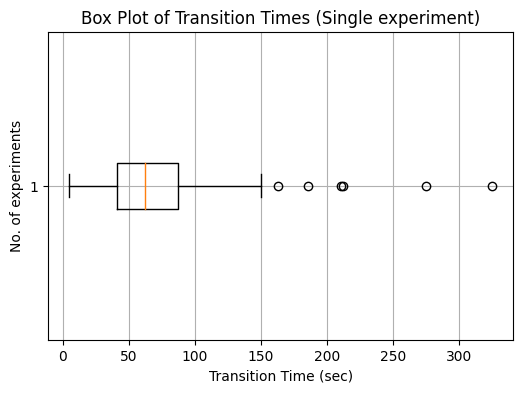

In [ ]:
plt.figure(figsize=(6, 4))
plt.boxplot(time, vert=False)
plt.xlabel('Transition Time (sec)')
plt.ylabel('No. of experiments')
plt.title('Box Plot of Transition Times (Single experiment)')
plt.grid(True)
plt.show()

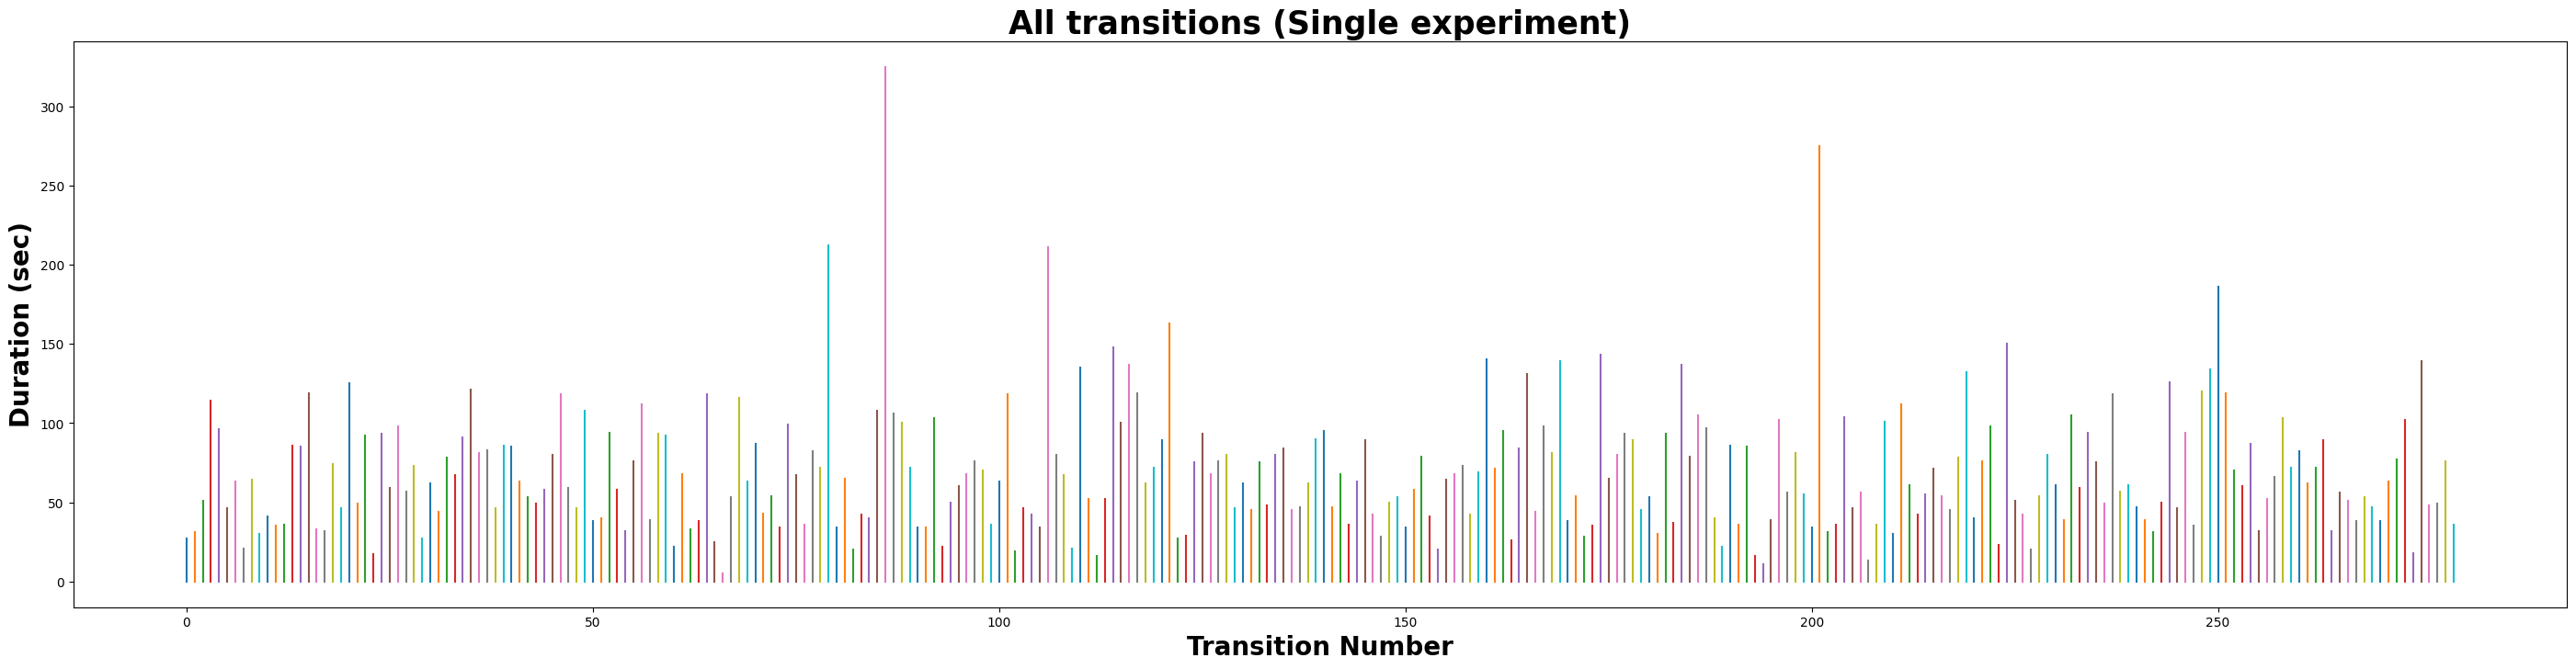

In [ ]:
plt.figure(figsize=(35, 8))
for i, duration in enumerate(time):
    plt.plot([i, i], [0, duration])
plt.xlabel('Transition Number', fontsize=20, fontweight='bold')
plt.ylabel('Duration (sec)', fontsize=20, fontweight='bold')
plt.title('All transitions (Single experiment)', fontsize=25, fontweight='bold')
plt.show()